In [1]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Move simulation data from discovery to local machine.

In [2]:
import subprocess
scp_list = [] # Fill list with integers that identify the simulations you want P vs d for
for i in scp_list:
    cis_from = f'white.do@xfer.discovery.neu.edu:/work/dipierrolab/douglas/PvsGenomic/PvsGenomic_directory_{i}.txt'
    trans_from = f'white.do@xfer.discovery.neu.edu:/work/dipierrolab/douglas/PvsGenomic/transPvsGenomic_directory_{i}.txt'
    to = '/Users/douglas/Documents/Features_Transfer/store_Ps_vs_genomic_graphs'
    subprocess.run(['scp', cis_from, to])
    subprocess.run(['scp', trans_from, to])

### Functions

In [3]:
def rebin(array_like, old_bins_per_new_bin):
    N = len(array_like)
    rebinned_list = []
    for i in range(round(N/old_bins_per_new_bin)):
        new_element = 0
        for j in range(old_bins_per_new_bin):
            new_element += array_like[old_bins_per_new_bin*i+j]
        new_element /= old_bins_per_new_bin # Sets the first bin's probability to 1
        rebinned_list.append(new_element)
    rebinned_array = np.array(rebinned_list)
    return rebinned_array

# Experiment binned at 1kb, old sims at 5kb (per bead), new sims at 500bp (per bead)
# To get the same bin size of 5kb for all of them, rebin accordingly:
#                                                         old_bins_per_new_bin = 5  for experiment
#                                                         old_bins_per_new_bin = 1  for old sims
#                                                         old_bins_per_new_bin = 10  for new sims

### Load experimental data.

In [4]:
# Cis
exp_cis_path = '/Users/douglas/Documents/Features_Transfer/figures/chr2_1kbRes_cis_P_vs_d.txt'
P_cis_experiment = rebin(np.loadtxt(exp_cis_path), 5)

# Trans
exp_trans_path = '/Users/douglas/Documents/Features_Transfer/figures/chr2_1kbRes_trans_P_vs_d.txt'
P_trans_experiment = rebin(np.loadtxt(exp_trans_path), 5)

### Load simulation P vs d data.

In [5]:
sim_path = '/Users/douglas/Documents/Features_Transfer/store_Ps_vs_genomic_graphs/'

# Simulation identifying numbers
old_sims = []#[1,2]
new_sims = [55,68]#[59,68]+[i for i in range(75,86)]

# Lists of file names
old_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in old_sims]
old_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in old_sims]
new_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in new_sims]
new_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in new_sims]

# Load the files into an list (of arrays) 
old_cis_matrices = [rebin(np.loadtxt(file_name), 1) for file_name in old_cis_file_names]
new_cis_matrices = [rebin(np.loadtxt(file_name), 10) for file_name in new_cis_file_names]
old_trans_matrices = [rebin(np.loadtxt(file_name), 1) for file_name in old_trans_file_names]
new_trans_matrices = [rebin(np.loadtxt(file_name), 10) for file_name in new_trans_file_names]

### Rescale experiment to compare better with simulation

In [6]:
pos = 1 # bin at which to equate cis experiment and cis simulation
    
if len(old_cis_matrices) !=0:
    for i in range(len(old_cis_matrices)):
        rescale_factor = P_cis_experiment[pos]/old_cis_matrices[i][pos]
        old_cis_matrices[i] *= rescale_factor
        old_trans_matrices[i] *= rescale_factor
        

if len(new_cis_matrices) !=0:
    for i in range(len(new_cis_matrices)):
        rescale_factor = P_cis_experiment[pos]/new_cis_matrices[i][pos]
        new_cis_matrices[i] *= rescale_factor
        new_trans_matrices[i] *= rescale_factor

### Make genomic distance arrays

In [7]:
N_exp = len(P_cis_experiment)
if len(old_cis_matrices) !=0:
    N_old_sim = len(old_cis_matrices[0])
else:
    N_old_sim = 0
    
if len(new_cis_matrices) !=0:
    N_new_sim = len(new_cis_matrices[0])
else:
    N_new_sim = 0

# 5* makes each bin 5kb
d_exp = 5*np.arange(N_exp)
d_old_sim = 5*np.arange(N_old_sim)
d_new_sim = 5*np.arange(N_new_sim)

## Plot P vs d

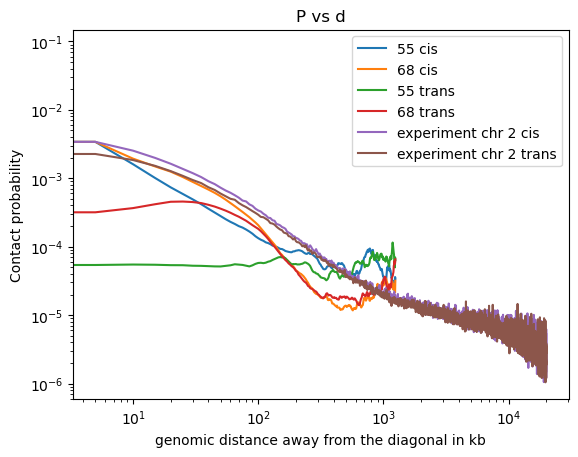

In [8]:
#Plot simulation P vs d
for i in range(len(old_sims)):
    plt.plot(d_old_sim, old_cis_matrices[i], label=str(old_sims[i])+' cis ')#, color='purple')

for i in range(len(old_sims)):
    plt.plot(d_old_sim, old_trans_matrices[i], label=str(old_sims[i])+' trans ')#, color='gold')

for i in range(len(new_sims)):
    plt.plot(d_new_sim, new_cis_matrices[i], label=str(new_sims[i])+' cis ')#, color='red')

for i in range(len(new_sims)):
    plt.plot(d_new_sim, new_trans_matrices[i], label=str(new_sims[i])+' trans ')#, color='orange')

# Plot experimental P vs d
plt.plot(d_exp, P_cis_experiment, label='experiment chr 2 cis')#, color='blue')
plt.plot(d_exp, P_trans_experiment, label='experiment chr 2 trans')#, color = 'green')

# Plot settings
plt.title('P vs d')
plt.legend()
plt.xlabel('genomic distance away from the diagonal in kb')
plt.xscale('log')
#plt.xlim(-1,3000)
plt.ylabel('Contact probability')
plt.yscale('log')

## Load gammas

In [9]:
lambda_path = '/Users/douglas/Documents/Features_Transfer/store_lambdas'

old_lambda_file_names = [lambda_path+f'/lambdas{i}.txt' for i in old_sims]

new_lambda_file_names = [lambda_path+f'/lambdas{i}.txt' for i in new_sims]

old_lambda_matrices = [np.loadtxt(file_name,delimiter=',',usecols = (0)) for file_name in old_lambda_file_names]
old_cis_gamma_vecs = [L[0:2500]-L[4999] for L in old_lambda_matrices]
old_trans_gamma_vecs = [L[2500:5000]-L[2499] for L in old_lambda_matrices]

new_lambda_matrices = [np.loadtxt(file_name,delimiter=',',usecols = (0)) for file_name in new_lambda_file_names]
new_cis_gamma_vecs = [L[0:2500]-L[4999] for L in new_lambda_matrices]
new_trans_gamma_vecs = [L[2500:5000]-L[2499] for L in new_lambda_matrices]

In [10]:
bead_size_old = 5 # kb
bead_size_new = .500 # kb

# 1D array of possible genomic distances in beads
d = np.array(range(2500))

## Plot gamma vs d

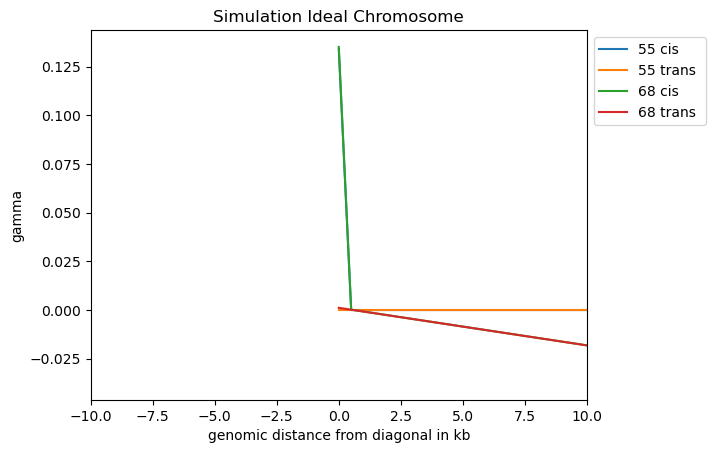

In [13]:
for i in range(len(old_sims)):
    plt.plot(d*bead_size_old, old_cis_gamma_vecs[i], label=str(old_sims[i])+' cis ')
    plt.plot(d*bead_size_old, old_trans_gamma_vecs[i], label=str(old_sims[i])+' trans ')

for i in range(len(new_sims)):
    plt.plot(d*bead_size_new, new_cis_gamma_vecs[i], label=str(new_sims[i])+' cis ')
    plt.plot(d*bead_size_new, new_trans_gamma_vecs[i], label=str(new_sims[i])+' trans ')

plt.title('Simulation Ideal Chromosome')
plt.xlabel('genomic distance from diagonal in kb')
plt.xlim(-10,10)
plt.ylabel('gamma')
plt.legend()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
